In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
def getMask(size=[128,128], porder = 5.0, bias = 0.1, acs = 3, seed = 0, axis_undersample=1, mute=0):
    # init
    mask = np.zeros(size)
    np.random.seed(seed)
    # gen random mask
    for i in range(size[1]):
        x = (i-size[1]/2.0)/(size[1]/2.0)
        p = np.random.rand() 
        if p <= abs(x)**porder + bias:
            if axis_undersample == 0:
                mask[i,:]=1
            else:
                mask[:,i]=1
    # acs                
    if axis_undersample == 0:
        mask[:(acs+1)/2,:]=1
        mask[-acs/2:,:]=1
    else:
        mask[:,:(acs+1)/2]=1
        mask[:,-acs/2:]=1

    # compute reduction
    r_factor = len(mask.flatten())/sum(mask.flatten())
    if not mute:
        print('gen mask for R-factor={0:.4f}'.format(r_factor))

    # use tf
    return mask, r_factor

In [4]:
mask, r_factor = getMask(size=[256,256], porder=10)
print(r_factor, np.where(mask[0,:]))

gen mask for R-factor=5.3333
(5.333333333333333, (array([  0,   1,   2,   3,   4,   5,   6,   9,  14,  15,  16,  24,  26,
        34,  43,  53,  67,  69,  75,  82,  87,  97,  99, 126, 159, 166,
       171, 173, 179, 198, 204, 205, 214, 231, 233, 234, 238, 241, 243,
       245, 247, 248, 249, 250, 252, 253, 254, 255]),))


In [5]:
#  generate mask based on alpha
def generate_mask_alpha(size=[128,128], r_factor_designed=5.0, r_alpha=3, axis_undersample=1,
                        acs=3, seed=0, mute=0):
    # init
    mask = np.zeros(size)
    if seed>=0:
        np.random.seed(seed)
    # get samples
    num_phase_encode = size[axis_undersample]
    num_phase_sampled = int(np.floor(num_phase_encode/r_factor_designed))
    # coordinate
    coordinate_normalized = np.array(xrange(num_phase_encode))
    coordinate_normalized = np.abs(coordinate_normalized-num_phase_encode/2)/(num_phase_encode/2.0)
    prob_sample = coordinate_normalized**r_alpha
    prob_sample = prob_sample/sum(prob_sample)
    # sample
    index_sample = np.random.choice(num_phase_encode, size=num_phase_sampled, 
                                    replace=False, p=prob_sample)
    # sample                
    if axis_undersample == 0:
        mask[index_sample,:]=1
    else:
        mask[:,index_sample]=1

    # acs                
    if axis_undersample == 0:
        mask[:(acs+1)/2,:]=1
        mask[-acs/2:,:]=1
    else:
        mask[:,:(acs+1)/2]=1
        mask[:,-acs/2:]=1

    # compute reduction
    r_factor = len(mask.flatten())/sum(mask.flatten())
    if not mute:
        print('gen mask size of {1} for R-factor={0:.4f}'.format(r_factor, mask.shape))
        print(num_phase_encode, num_phase_sampled, np.where(mask[0,:]))

    return mask, r_factor

In [32]:
mask,r_factor=generate_mask_alpha(size=[128,128], r_factor_designed=5.0, 
                                  r_alpha=0.1,seed=-1)

gen mask size of (128, 128) for R-factor=4.5714
(128, 25, (array([  0,   1,   9,  12,  18,  21,  22,  24,  26,  29,  30,  37,  41,
        50,  58,  63,  74,  77,  81,  90,  95, 105, 110, 113, 117, 118,
       126, 127]),))


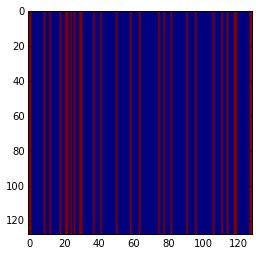

In [33]:
plt.imshow(mask)

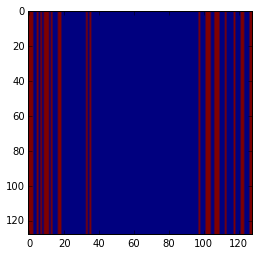

In [21]:
plt.imshow(mask)